# K-medias con Optimización de K
Ejemplo de implementación del algoritmo k-medias utilizando el conjunto de datos de un modelo de negocios de distribución

### Conjunto de Datos

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

datos = pd.read_csv('S7_KMEANS_RESELLER_Daily.csv')
datos.head(10)

,Country,ResellerID,Trans12Mo,Units12Mo
0,Argentina,4810912,1,1
1,Argentina,56864507,1,1
2,Argentina,54239933,1,1
3,Argentina,54310743,1,1
4,Argentina,56624338,1,1
5,Argentina,18682185,1,1
6,Argentina,4338296,1,1
7,Argentina,379814,1,1
8,Argentina,38878909,1,1
9,Argentina,6720414,1,1


Text(0,0.5,'# of Licenses bought')

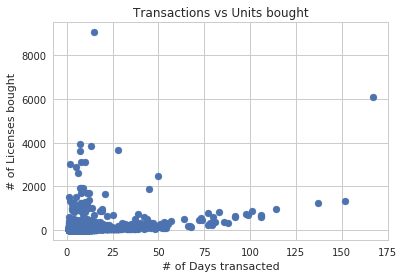

In [33]:
plt.scatter(datos['Trans12Mo'],datos['Units12Mo'])
plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

In [34]:
X1 =np.array([datos['Trans12Mo'],datos['Units12Mo']])
X=np.transpose(X1)

print(X)

[[   1    1]
 [   1    1]
 [   1    1]
 ...
 [   7 3950]
 [ 167 6079]
 [  15 9063]]


### Función de Optimización de K

In [35]:
def make_list_of_K(K, dataframe):

    #inputs: K as integer and dataframe apply k-means clustering to dataframeand make a list of inertia values against 1 to K return the inertia values list
    cluster_values = list(range(1, K+1))
    inertia_values=[]
    
    for c in cluster_values:
        model = KMeans(n_clusters = c, init='k-means++', max_iter=500, random_state=42)
        model.fit(dataframe)
        inertia_values.append(model.inertia_)
    
    return inertia_values, cluster_values

In [38]:
list_k = np.array(make_list_of_K(20,X))
list_new = np.transpose(list_k)
print(list_new)

[[3.11313103e+08 1.00000000e+00]
 [1.24714944e+08 2.00000000e+00]
 [6.45961832e+07 3.00000000e+00]
 [3.36616697e+07 4.00000000e+00]
 [1.92609623e+07 5.00000000e+00]
 [1.47972823e+07 6.00000000e+00]
 [1.06740394e+07 7.00000000e+00]
 [7.61854353e+06 8.00000000e+00]
 [5.66129592e+06 9.00000000e+00]
 [4.11893166e+06 1.00000000e+01]
 [3.13944081e+06 1.10000000e+01]
 [2.52001135e+06 1.20000000e+01]
 [2.15305565e+06 1.30000000e+01]
 [1.83489956e+06 1.40000000e+01]
 [1.55435781e+06 1.50000000e+01]
 [1.35499096e+06 1.60000000e+01]
 [1.16832891e+06 1.70000000e+01]
 [1.06141478e+06 1.80000000e+01]
 [9.58141364e+05 1.90000000e+01]
 [8.78022219e+05 2.00000000e+01]]


Text(0,0.5,'Valor de Inercia')

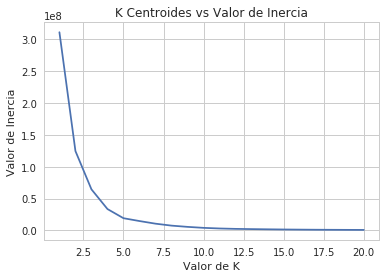

In [39]:
plt.plot(list_new[:,1],list_new[:,0])
plt.title('K Centroides vs Valor de Inercia')
plt.xlabel('Valor de K')
plt.ylabel('Valor de Inercia')

### Creación del modelo k-medias
Se utilizan las primeras dos características del conjunto de datos

In [ ]:
# Crear modelo e inducirlo
modelo = KMeans(init='k-means++',n_clusters=5)
modelo.fit(X)

### Inspección del modelo k-medias

In [ ]:
# Obtiene las etiquetas que especifican a qué grupo pertenecen los datos de X
y = modelo.predict(X)

# Obtiene las coordenadas de los centroides
C = modelo.cluster_centers_

# Grafica los datos agrupados
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='x',color = 'green', s = 100)

plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

### Predicción de nuevos elementos

In [ ]:
# Datos de prueba (originalmente no están en el conjunto de datos)
import numpy as np
Xp = np.array([[4,2],[6,4],[7,3.5]])

# Grafica los datos junto con los grupos obtenidos previamente
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='x',color = 'red', s = 100)

plt.scatter(Xp[:,0],Xp[:,1],color = 'black', marker = '^', s = 100)

plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

In [ ]:
# Predice el grupo al que pertenecen
yp = modelo.predict(Xp)

# Grafica la predicción
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='x',color = 'red', s = 100)

plt.scatter(Xp[:,0],Xp[:,1],c=yp, marker = '^', s = 100)

plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

In [ ]:
results = np.transpose(np.array([X[:,0],X[:,1],y]))
ResultsF=np.transpose(np.array([datos['ResellerID'],results[:,0],results[:,1],results[:,2]]))
print(ResultsF)

In [ ]:
y=np.savetxt("report.csv",ResultsF,  delimiter=",")

In [ ]:
modelo.score(X)